In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
#Assume a folder named dataset exists in the same directory as the code repository
data_path = '../dataset'

#assume dataset itself is just named dataset.txt
df = pd.read_csv(os.path.join(data_path, "dataset.txt"), delimiter = "\t")

### Basic Properties

Names of columns

In [14]:
df.columns.values

array(['CHR', 'START', 'END', 'STRAND', 'GENE', 'TRANSCRIPT', 'IVS',
       'IVS_SIZE', 'BP_POS', 'BP_ACC_DIST', 'BP_ACC_SEQ', 'IVS_SEQ'],
      dtype=object)

samples and features

In [17]:
print(df.shape)

(177980, 12)


### Abundance of different chromosomes in dataset

In [20]:
#Finding all chromosome types
chromosome_types = np.array([]).astype(str)
for i in range(len(df["CHR"])):
    if (chromosome_types == df["CHR"][i]).any() == False:
        chromosome_types = np.concatenate((chromosome_types, [df["CHR"][i]]))

In [21]:
#Finding their abundance
chromosome_abundance = []
for chrom_type in chromosome_types:
    number = np.sum((df["CHR"] == chrom_type))
    chromosome_abundance.append(number)

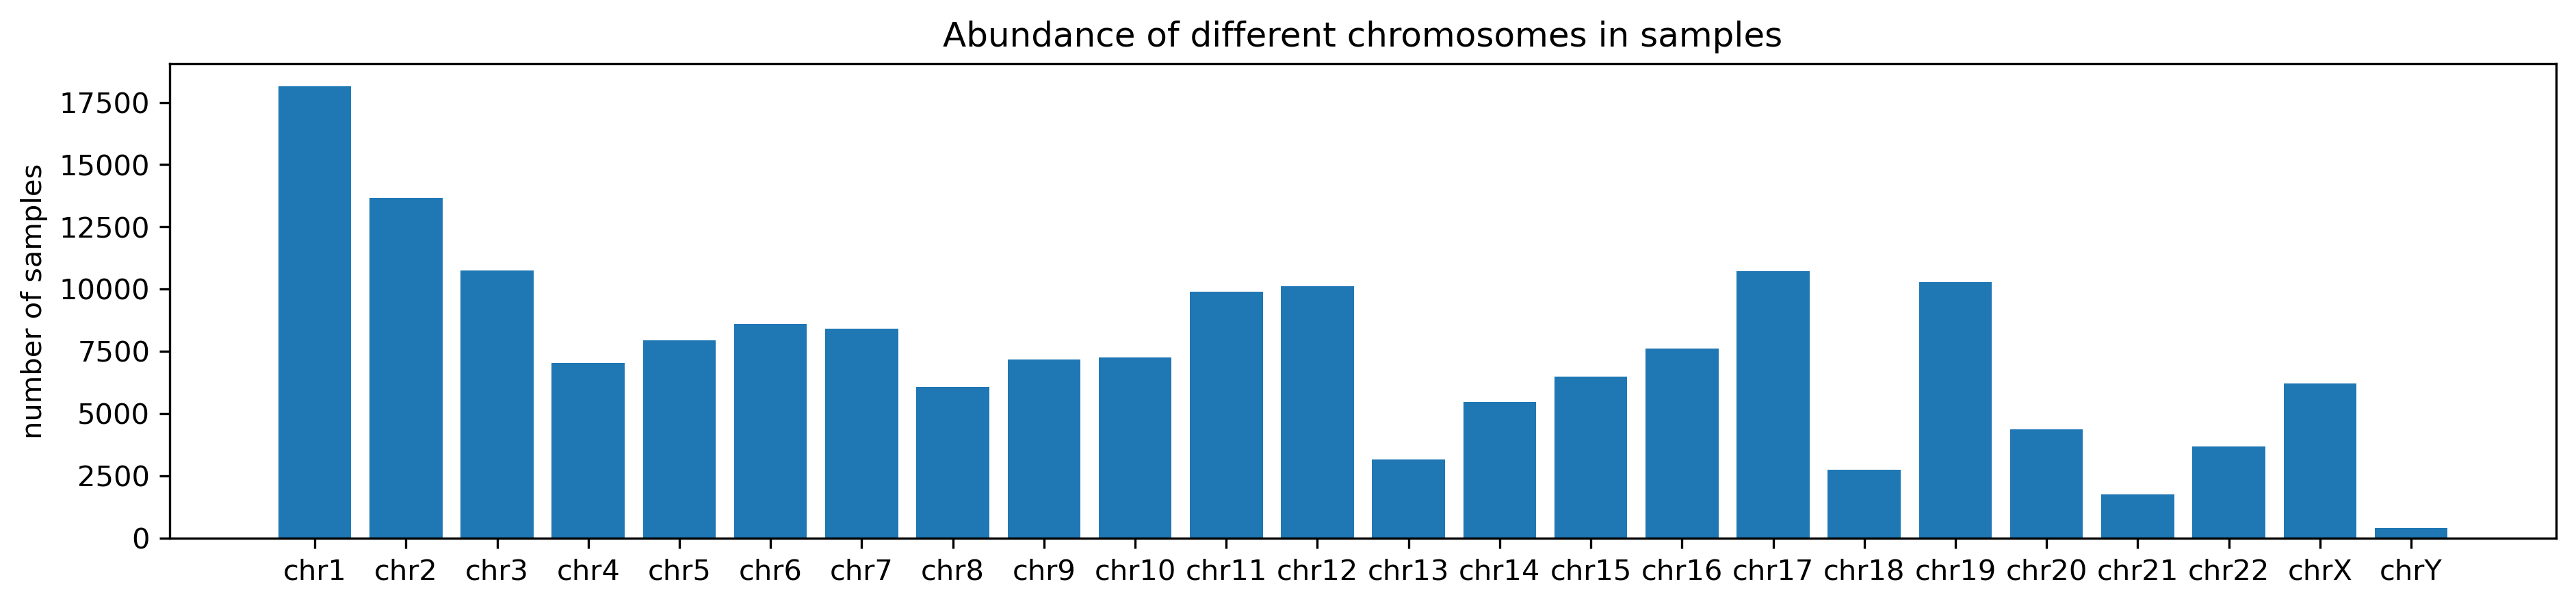

In [22]:
#plotting chromosome abundance
fig, ax = plt.subplots(figsize = (15,3), dpi = 300)
ax.bar(chromosome_types, chromosome_abundance)
ax.set_ylabel('number of samples')
ax.set_title('Abundance of different chromosomes in samples')
plt.show()

### Abundance of genes in dataset

In [24]:
#Finding all genes
gene_types = np.array([]).astype(str)
for i in range(len(df["GENE"])):
    if (gene_types == df["GENE"][i]).any() == False:
        gene_types = np.concatenate((gene_types, [df["GENE"][i]]))

In [25]:
#Finding relevant abundance of all genes
gene_abundance = []
for gene_type in gene_types:
    number = np.sum((df["GENE"] == gene_type))
    gene_abundance.append(number)

In [26]:
#20 most common genes
index = np.flip(np.argsort(gene_abundance))[:20]

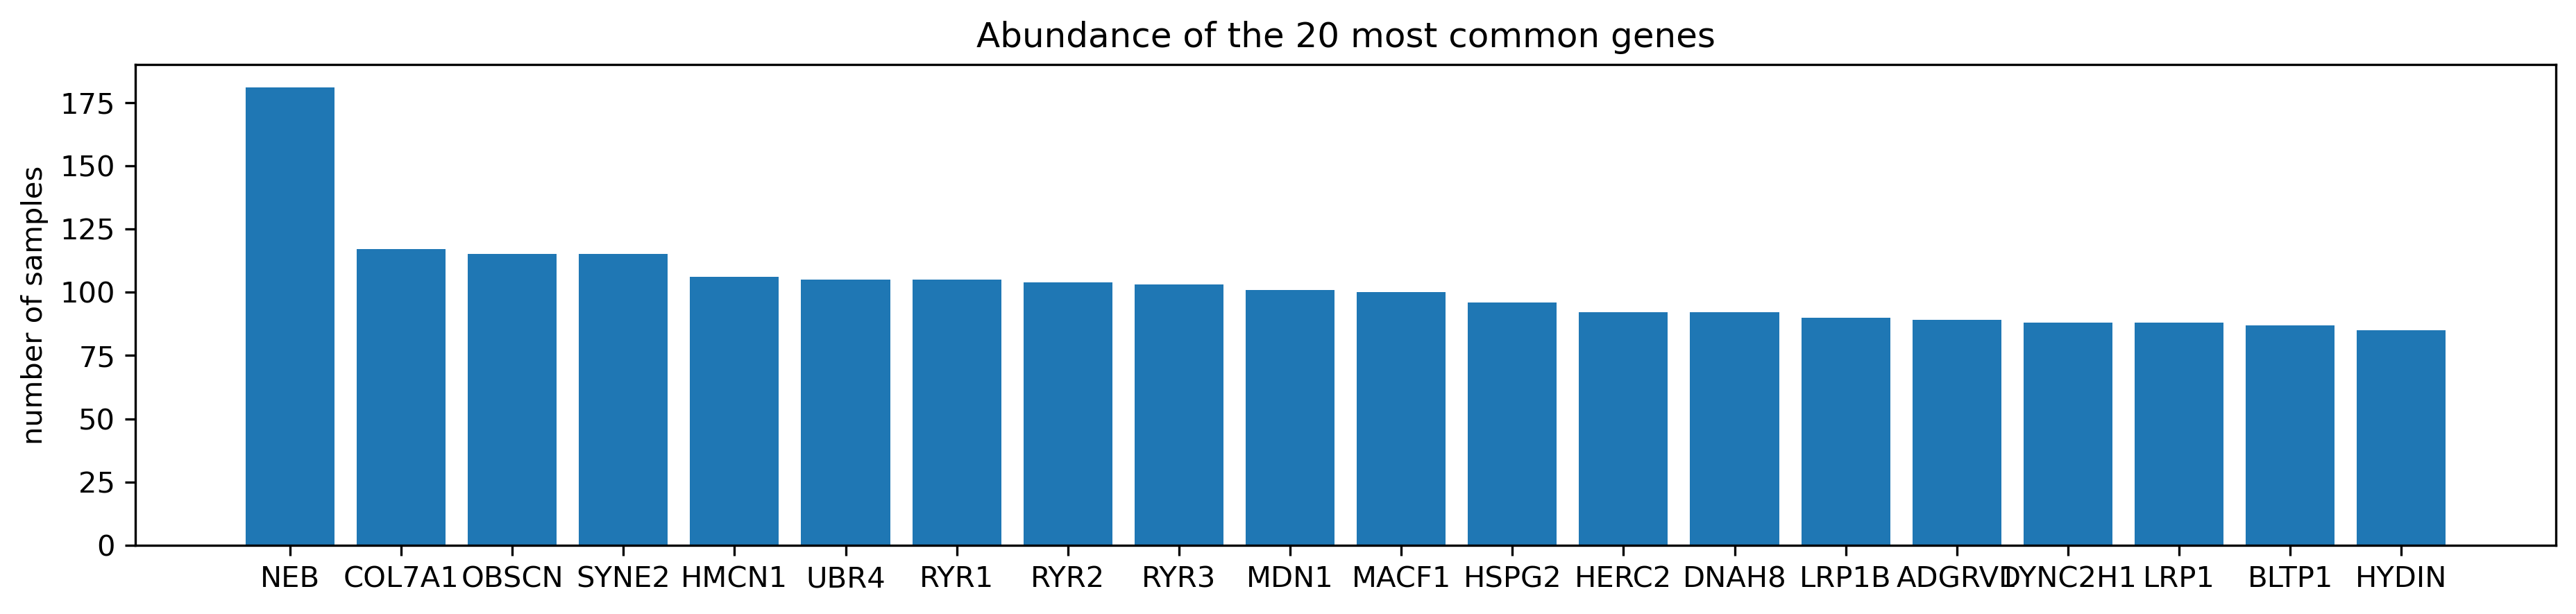

In [27]:
#Plot abundance of genes
fig, ax = plt.subplots(figsize = (15,3), dpi = 300)
ax.bar(gene_types[index], np.array(gene_abundance)[index])
ax.set_ylabel('number of samples')
ax.set_title('Abundance of the 20 most common genes')
plt.show()

### Check what kind of strands exist

In [30]:
#Finding all genes
strand_types = np.array([]).astype(str)
for i in range(len(df["STRAND"])):
    if (strand_types == df["STRAND"][i]).any() == False:
        strand_types = np.concatenate((strand_types, [df["STRAND"][i]]))

In [32]:
#Finding relevant abundance of all genes
strand_abundance = []
for strand_type in strand_types:
    number = np.sum((df["STRAND"] == strand_type))
    strand_abundance.append(number)

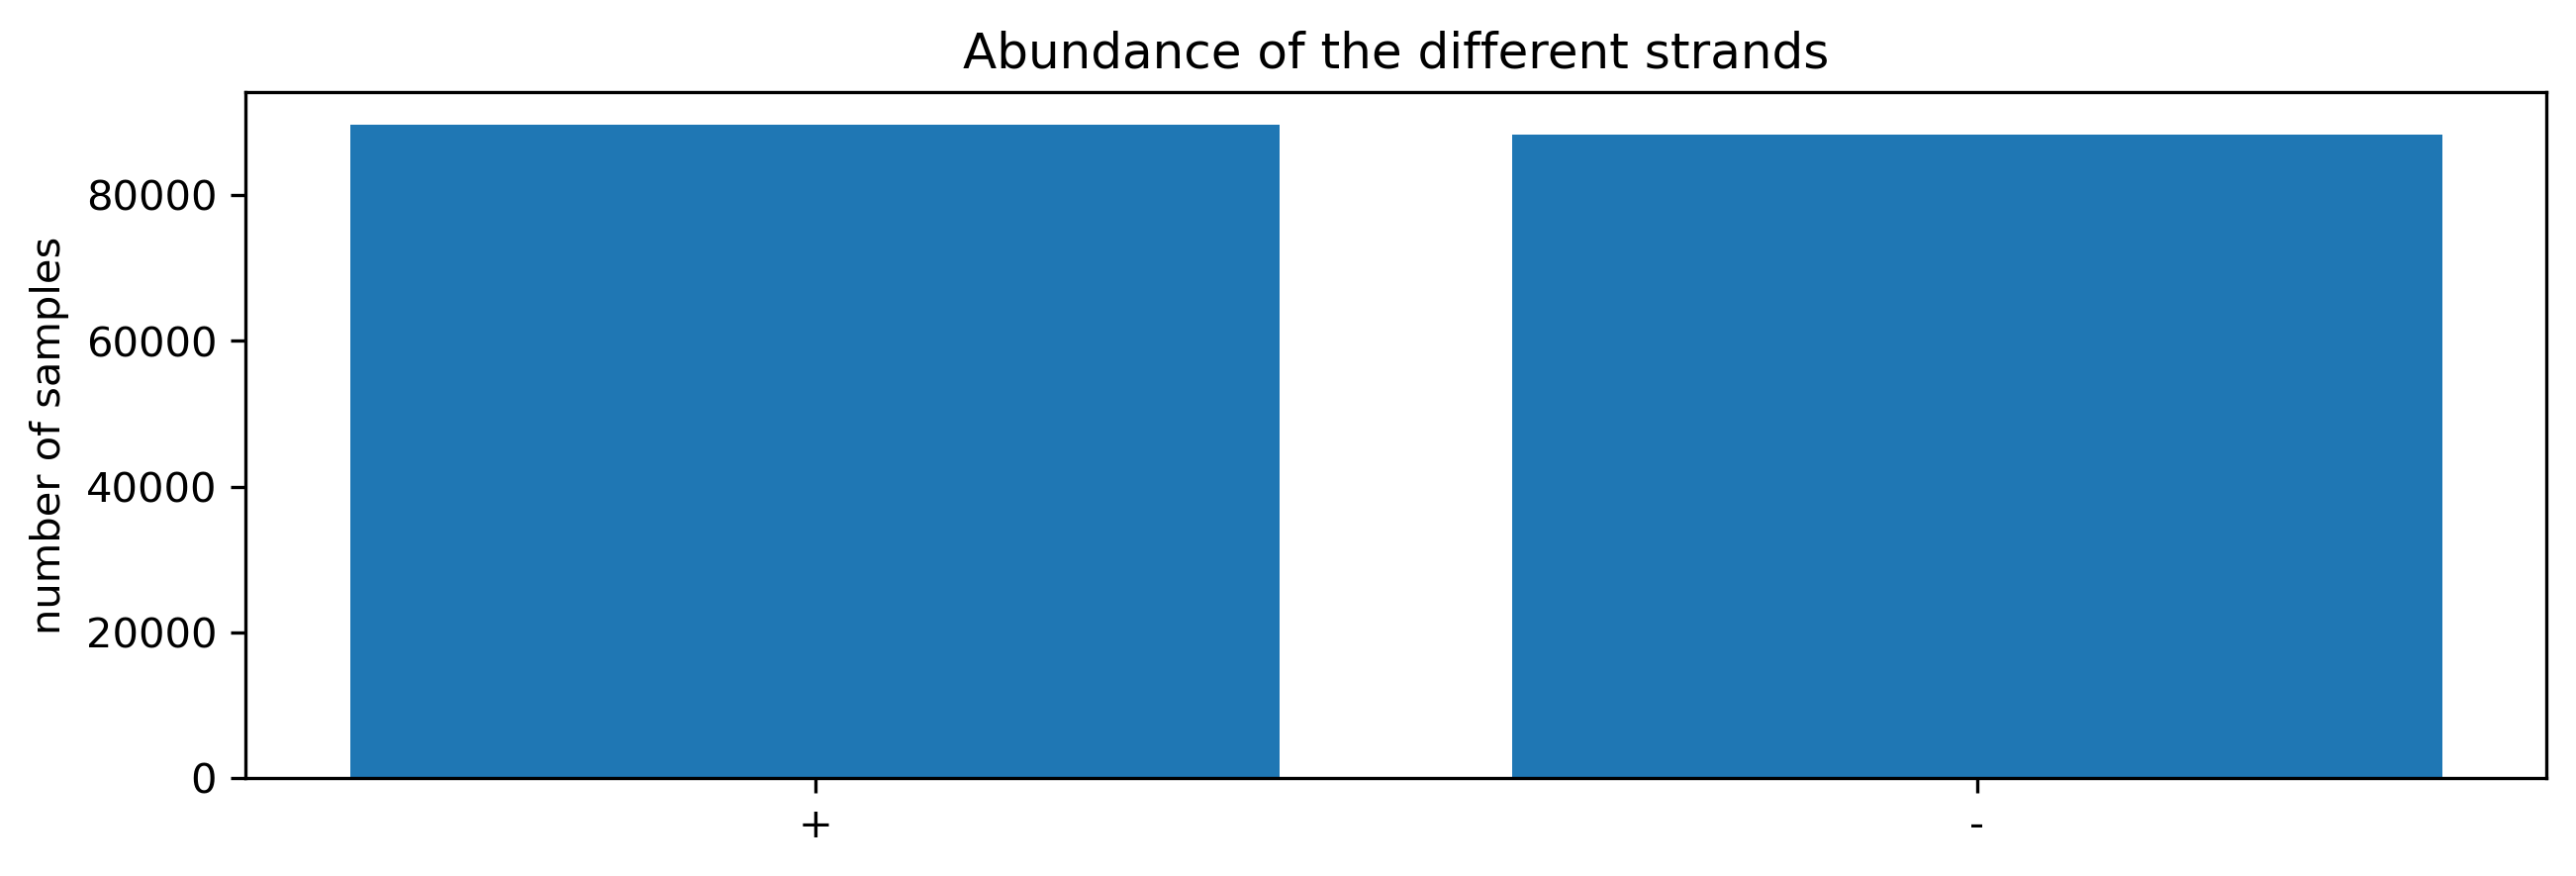

In [33]:
#Plot abundance of genes
fig, ax = plt.subplots(figsize = (10,3), dpi = 300)
ax.bar(strand_types, strand_abundance)
ax.set_ylabel('number of samples')
ax.set_title('Abundance of the different strands')
plt.show()

Honest to god I have no idea what the strands are, but apparently there are two types and they are equally abundant.

### Double check that start and stop matches size and sequence

In [37]:
df["END"]-df["START"]

0          972
1         4140
2          701
3         4681
4         3142
          ... 
177975    2853
177976     691
177977    6549
177978      93
177979     419
Length: 177980, dtype: int64

In [38]:
df["IVS_SIZE"]

0          973
1         4141
2          702
3         4682
4         3143
          ... 
177975    2854
177976     692
177977    6550
177978      94
177979     420
Name: IVS_SIZE, Length: 177980, dtype: int64

In [39]:
len(df["IVS_SEQ"][0])

973

Checks out if both start and stop are inclusive

### Sequence lengths histogram

In [42]:
lengths = df["IVS_SIZE"].to_numpy()

In [43]:
minimum = np.min(lengths)
maximum = np.max(lengths)
avg = np.mean(lengths)

C:\Users\olive\AppData\Local\Temp\ipykernel_2400\394459453.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


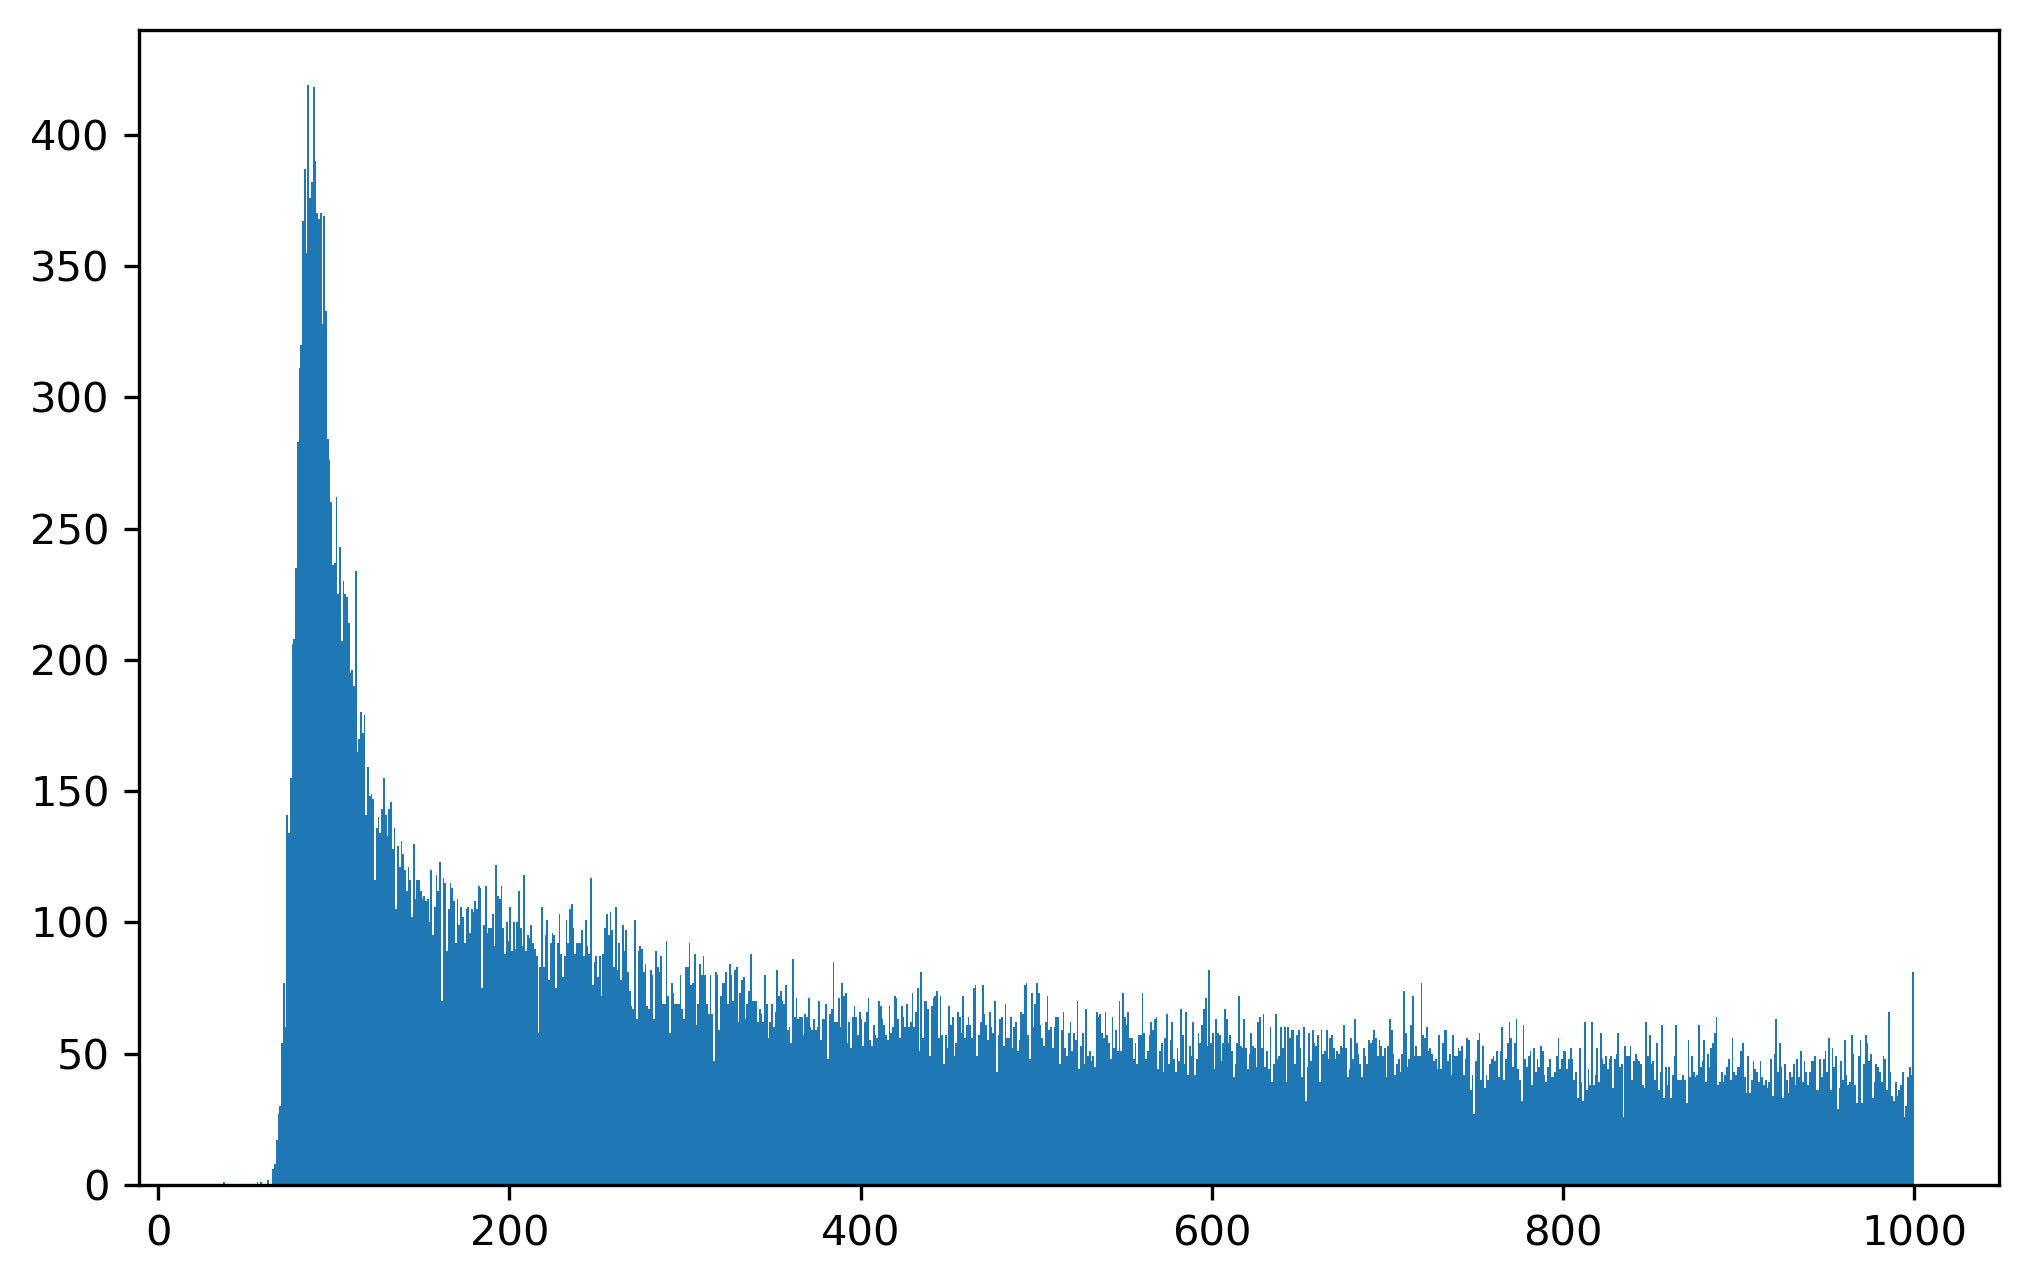

In [44]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 300)
n, bins, patches = ax.hist(lengths, 1000-minimum, (minimum,1000))
fig.show()

In [45]:
minimum

37

In [46]:
maximum

1065861

In [47]:
avg

5861.703595909653

100 entries in each sequence is common, but distribution has an extremely long tail. Maximum length is of order million. Not sure how thats going to fit into the network. 

### Branch point acid types

In [50]:
#Not the prettiest code, but I'm lazy
As = 0
Cs = 0
Ts = 0
Gs = 0
for i, sequence in enumerate(df["IVS_SEQ"]):
    if sequence[df["BP_POS"][i] - df["START"][i]] == "A":
        As += 1
    if sequence[df["BP_POS"][i] - df["START"][i]] == "C":
        Cs += 1
    if sequence[df["BP_POS"][i] - df["START"][i]] == "T":
        Ts += 1
    if sequence[df["BP_POS"][i] - df["START"][i]] == "G":
        Gs += 1


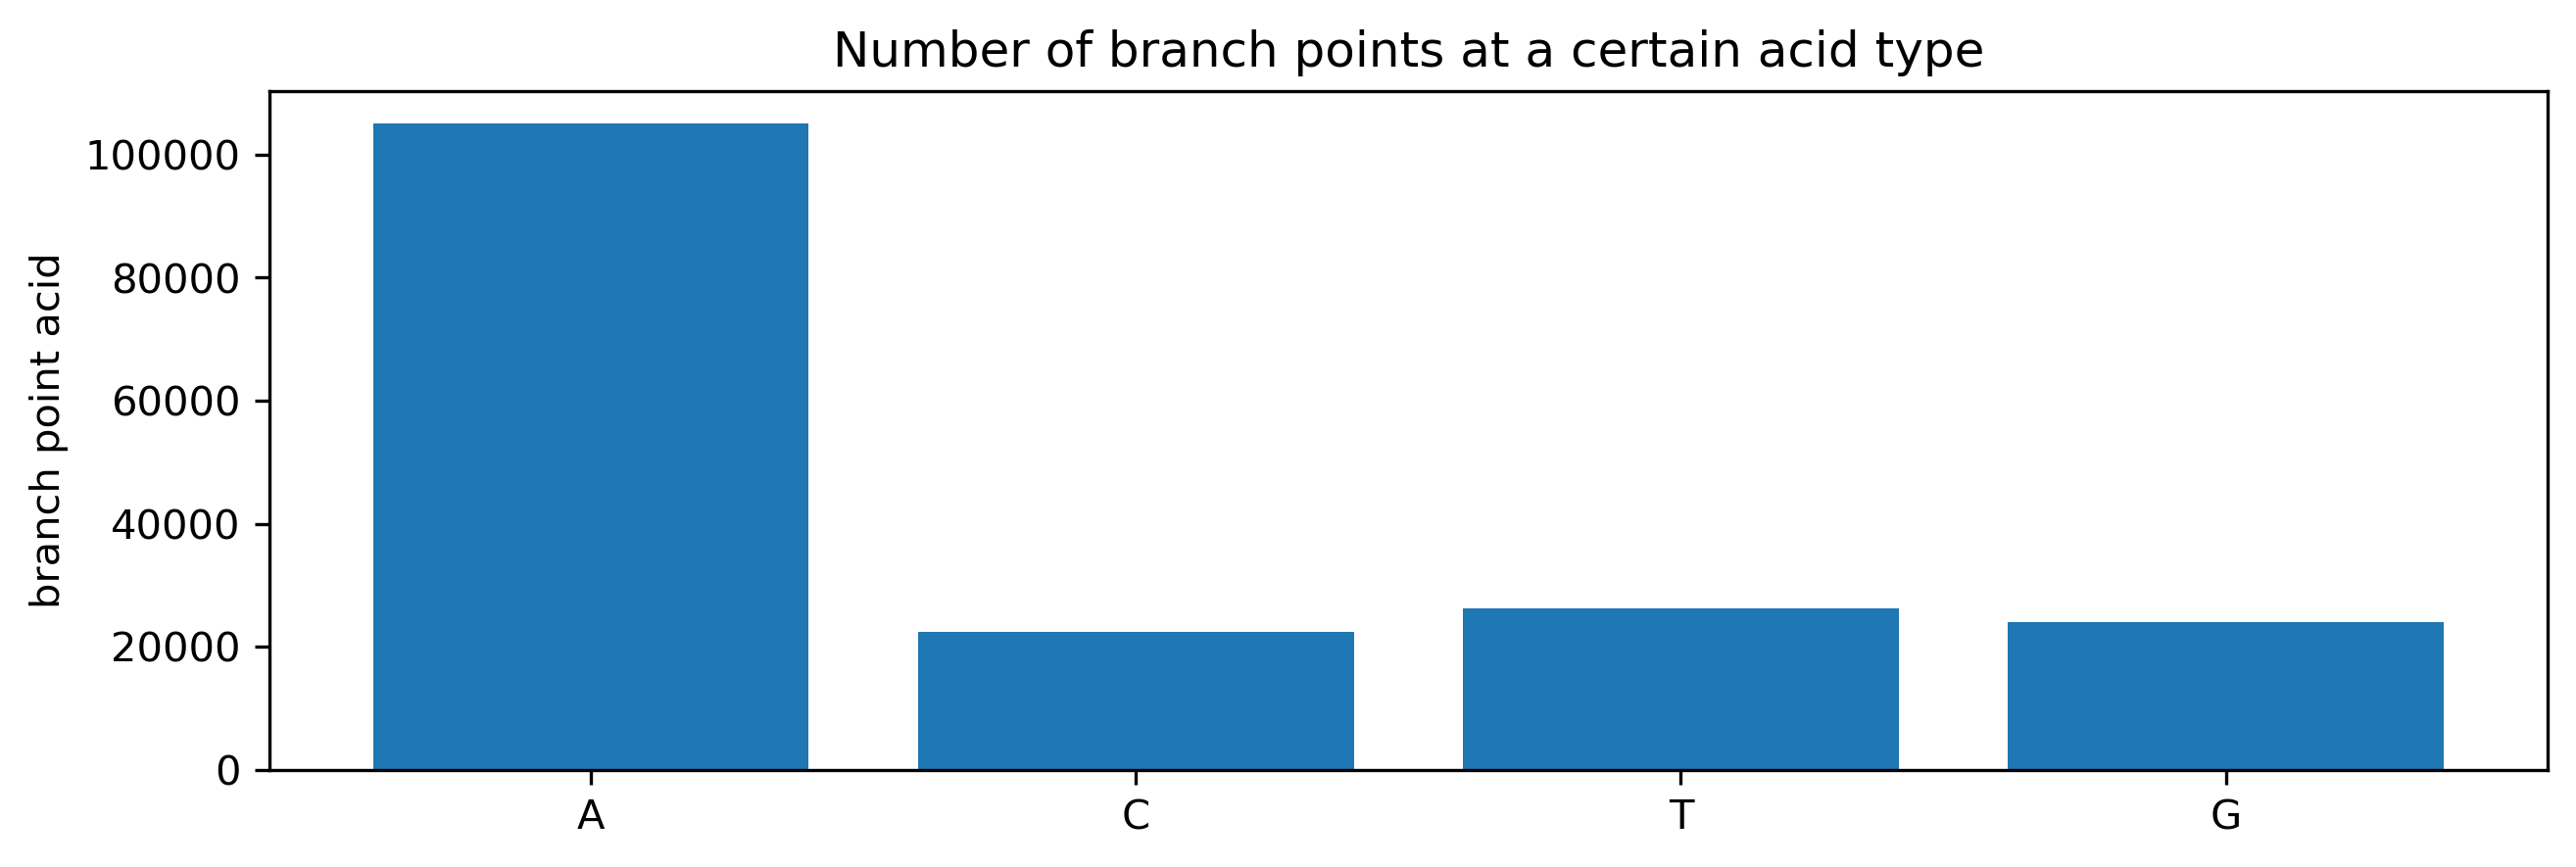

In [51]:
#Plot abundance of genes
fig, ax = plt.subplots(figsize = (10,3), dpi = 300)
ax.bar(["A", "C", "T", "G"], [As, Cs, Ts, Gs])
ax.set_ylabel('branch point acid')
ax.set_title('Number of branch points at a certain acid type')
plt.show()

### Code for packaging the training data
I think this should work but we will see

In [53]:
input_sequences = df["IVS_SEQ"]
input_labels = []
for i in range(len(input_sequences)):
    label_sequence = (df["BP_POS"][i]-df["START"][i])*"0" + "1" + (df["END"][i]-df["BP_POS"][i])*"0"
    input_labels.append(label_sequence)